### Example of sampling with pymc3

In [1]:
from FeedForwardNN import Feedforward
from Toy_Datasets import two_clusters_gaussian, plot_decision_boundary
from Neural_Network import NLM,Classifier
import autograd.numpy as np
from sklearn.linear_model import LogisticRegression
from autograd import grad
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from autograd.misc.optimizers import adam
from Bayesian_pdf import get_log_prior, get_log_likelihood
from Hamiltonian_MC import hmc
from sklearn.model_selection import train_test_split
from pandas import get_dummies

In [2]:
def two_clusters_gaussian(params, n_samples, test_points=None):
    """
    :param params: should be a list of length K, K being the number of classes you wish to create
    for every class 0 <= k <=K-1, params[k] should be a dictionnary containing two keys: mean and covariance_matrix.
    The shapes expected for mean are D and covariance_matrix are D*D where D is the number of features for every
    datapoint.
    :param n_samples: number of samples you wish to create for every cluster
    :param test_points: OOD points
    :return: x of len(K*n_samples, n_features) and y of shape (K*n_samples). For both x and y, the features pertain
    sequentially to every class 0 <= k <= K-1
    """
    if params:
        if isinstance(params, list):  # params is a list
            K = len(params)
        else:  # params is a numpy array
            K = params.shape[0]	
        x = np.array([0, 0])
        for k, param in enumerate(params):
            param_k = params[k]
            try:
                mean_k, cov_k = param_k['mean'], param_k['covariance_matrix']
            except KeyError:
                raise KeyError('The parameters for class ' + str(k) + 'are not in the right dictionnary format. Please use mean and covariance_matrix')
            assert len(mean_k) == cov_k.shape[0] == cov_k.shape[1], 'Wrong shapes for the parameters of class ' + str(k)
            samples_class_k = np.random.multivariate_normal(mean_k, cov_k, n_samples)
            x = np.vstack((x, samples_class_k))
        y = np.array([[k] * n_samples for k in range(K)])
        return x[1:, :], np.array(y).flatten()
    else:
        raise BaseException().args

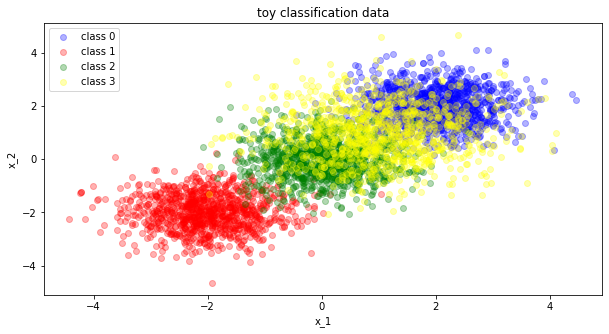

In [3]:
params_1 = {'mean': [2, 2], 'covariance_matrix': 0.5*np.eye(2)}
params_2 = {'mean': [-2, -2], 'covariance_matrix': 0.5 * np.eye(2)}
params_3 = {'mean': [0, 0], 'covariance_matrix': 0.5 * np.eye(2)}
params_4 = {'mean': [1, 1], 'covariance_matrix': 1 * np.eye(2)}

params = [params_1, params_2,params_3,params_4]
x, y = two_clusters_gaussian(params, 1000)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.3, color='blue', label='class 0')
ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.3, color='red', label='class 1')
ax.scatter(x[y == 2, 0], x[y == 2, 1], alpha=0.3, color='green', label='class 2')
ax.scatter(x[y == 3, 0], x[y == 3, 1], alpha=0.3, color='yellow', label='class 3')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data')
ax.legend(loc='best')
plt.show()

In [18]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)


###neural network model design choices
width = 10
hidden_layers = 5
input_dim = 2
output_dim = 4

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'prior': 'normal',
               'prior_parameters':{'mean': np.zeros(5), 'covariance_matrix': np.eye(5)},
               'likelihood': 'logistic',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nlm = NLM(architecture, random=random)

In [19]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':1500, 
          'random_restarts':1}

#fit my neural network to minimize MSE on the given data
#nlm.fit_MLE(x.T, y.reshape(1,-1), params)


y_ = get_dummies(y).values
X_train, X_test, y_train, y_test = train_test_split(x, y_, train_size=0.8, random_state=random)
nlm.fit_MLE(X_train.T, y_train.T, params)

Iteration 0 lower bound 20.320812153785592; gradient mag: 33.074967553376354
Iteration 100 lower bound 4.315732169657065; gradient mag: 12.124951790245284
Iteration 200 lower bound 1.194917292134434; gradient mag: 2.7385959400012356
Iteration 300 lower bound 0.7394021922834092; gradient mag: 0.9423517264827277
Iteration 400 lower bound 0.6099300160480198; gradient mag: 1.9019004165951647
Iteration 500 lower bound 0.55184800721142; gradient mag: 9.666346671239717
Iteration 600 lower bound 0.5205942083801673; gradient mag: 3.8514781244842062
Iteration 700 lower bound 0.5054544331421106; gradient mag: 1.386247211422785
Iteration 800 lower bound 0.4952005963707111; gradient mag: 6.403863128881724
Iteration 900 lower bound 0.4869709132622751; gradient mag: 3.929409248564487
Iteration 1000 lower bound 0.48164044042418164; gradient mag: 7.994334496987256
Iteration 1100 lower bound 0.47756342111866923; gradient mag: 11.754959873069883
Iteration 1200 lower bound 0.47374200655427967; gradient ma

### Now I am doing fit.NML manuellement

In [15]:
conda uninstall clang_osx-64

Solving environment: done

## Package Plan ##

  environment location: /Users/pellegrinraphael/opt/anaconda3

  removed specs:
    - clang_osx-64


The following packages will be REMOVED:

  cctools-927.0.2-h5ba7a2e_4
  clang-10.0.0-default_hf57f61e_0
  clang_osx-64-10.0.0-h05bbb7f_0
  clangxx-10.0.0-default_hf57f61e_0
  compiler-rt-10.0.0-h47ead80_0
  compiler-rt_osx-64-10.0.0-hbcc88fd_0
  ld64-450.3-h3c32e8a_4
  libllvm10-10.0.1-h76017ad_5
  tapi-1000.10.8-ha1b3eb9_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pymc3 as pm
import theano.tensor as T
import autograd.numpy as np
from scipy.special import softmax

def pymc3_sampling_notebook(D, out_last_hidden_layer, output_dim, out_y):
    """
    INPUTS:
    D: dimension of the last hidden layer
    sigma_in: std of the prior (a normal, with mean 0)

    OUTPUTS:
    """
    with pm.Model() as replacing_HMC:  
        # w has a prior: N(0,1) 
        # Output dim number of bias
        w = pm.Normal('w', mu=0, tau=1, shape=(D*output_dim+output_dim)) 
        linear_combinations=[]
        for j in range(output_dim):
            dot=pm.math.dot(out_last_hidden_layer[0].T,w[j*D:j*D+D])+w[-j]
            linear_combi = pm.Deterministic('s'+str(j),dot)
            linear_combinations.append(linear_combi)
        thetas = pm.Deterministic('theta', T.nnet.softmax(linear_combinations))
        # or thetas = pm.Deterministic('theta', pm.math.softmax(linear_combi))?
        # Y commes from a Categorical(thetas)
        y_obs = pm.Categorical('y_obs', p=thetas.T, observed=out_y)
        trace = pm.sample(200,chains=1)
    return trace

In [23]:
y_train.shape

(3200, 4)

In [25]:
traces=pymc3_sampling_notebook(10, nlm.forward(nlm.weights,X_train.T,partial=True), 4, y_train.T)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '91593' (I am process '90791')
Only 200 samples in chain.
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
INFO:pymc3:Sequential sampling (1 chains in 1 job)
NUTS: [w]
INFO:pymc3:NUTS: [w]


Sampling 1 chain for 1_000 tune and 200 draw iterations (1_000 + 200 draws total) took 2118 seconds.
INFO:pymc3:Sampling 1 chain for 1_000 tune and 200 draw iterations (1_000 + 200 draws total) took 2118 seconds.
There were 170 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 170 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7058532399908117, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks
INFO:pymc3:Only one chain was sampled, this makes it impossible to run some convergence checks


In [ ]:
len(traces)

In [ ]:
w_0=[]
w_1=[]
w_2=[]
for i in range(len(traces['w'])):    
    w_0.append(traces['w'][i][0])        
    w_1.append(traces['w'][i][1])        
    w_2.append(traces['w'][i][2])
    
fig, ax=plt.subplots(3,1,figsize=(18,30))
ax[0].plot(range(len(w_0)), w_0, color='b')
ax[1].plot(range(len(w_1)), w_1, color='r')
ax[2].plot(range(len(w_2)), w_2, color='y')

#### Load it from the file

In [ ]:
cd /Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/

In [ ]:
from Pymc3sampler import pymc3_sampling